### Klasifikasi dengan SVM
**Bintang Kevin Hizkia Samosir**  
**Binus Graduate Program**


Diberikan dataset berisi hasil pengukuran 20 bunga Iris dari dua spesies berbeda -
Versicolor (C1) dan Virginica (C2). Data input adalah x1: panjang kelopak, x2: lebar
kelopak.

<table>
<thead>
<tr>
<th></th>
<th colspan="2">C1</th>
<th colspan="2">C2</th>
</tr>
<tr>
<th>Sample</th>
<th>x1</th>
<th>x2</th>
<th>x1</th>
<th>x2</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>4.1</td>
<td>1.3</td>
<td>5.1</td>
<td>1.8</td>
</tr>
<tr>
<td>2</td>
<td>4.2</td>
<td>1.3</td>
<td>5.1</td>
<td>2.4</td>
</tr>
<tr>
<td>3</td>
<td>4.3</td>
<td>1.3</td>
<td>5.3</td>
<td>1.9</td>
</tr>
<tr>
<td>4</td>
<td>4.4</td>
<td>1.4</td>
<td>5.3</td>
<td>2.3</td>
</tr>
<tr>
<td>5</td>
<td>4.5</td>
<td>1.6</td>
<td>5.5</td>
<td>2.1</td>
</tr>
<tr>
<td>6</td>
<td>4.6</td>
<td>1.4</td>
<td>5.5</td>
<td>1.8</td>
</tr>
<tr>
<td>7</td>
<td>4.7</td>
<td>1.2</td>
<td>5.7</td>
<td>2.3</td>
</tr>
<tr>
<td>8</td>
<td>4.7</td>
<td>1.5</td>
<td>5.8</td>
<td>2.2</td>
</tr>
<tr>
<td>9</td>
<td>4.8</td>
<td>1.4</td>
<td>5.9</td>
<td>2.1</td>
</tr>
<tr>
<td>10</td>
<td>4.9</td>
<td>1.5</td>
<td>6.1</td>
<td>2.5</td>
</tr>
</tbody>
</table>


***
### Soal
1. Bangunlah model klasifikator berbasis lineare-SVM. Latih model 10 kali, lalu buat kurva pembelajaran. Catatan: Anda boleh menggunakan paket Python seperti Scikit-learn atau TensorFlow;

- Pertama kita akan mengkonversi tabel menjadi array, disini panjang dan lebar kelopak dari dua spesies bunga akan kita masukkan ke dalam variabel X sebagai array 2 dimensi.

In [107]:
import numpy as np

X = np.array([[4.1, 1.3], [4.2, 1.3], [4.3, 1.3], [4.4, 1.4], [4.5, 1.6], [4.6, 1.4], [4.7, 1.2], [4.7, 1.5], [4.8, 1.4], [4.9, 1.5],
              [5.1, 1.8], [5.1, 2.4], [5.3, 1.9], [5.3, 2.3], [5.5, 2.1], [5.5, 1.8], [5.7, 2.3], [5.8, 2.2], [5.9, 2.1], [6.1, 2.5]])


- Ada dua kelas yaitu C1 dan C2, mewakili Versicolor dan Verginica. Di code akan kita wakili dengan nilai biner 0 dan 1 dan disimpan dalam variabel y sebagai array satu dimensi, disusun dalam array dimana indeks nya sama dengan pasangan nya di variabel X

In [108]:
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- Membuat model linear-SVM dan melatihnya pada data latih. (Tapi dengan method yang memang khusus untuk generate kurva pembelajaran)

In [109]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve 
from sklearn.model_selection import KFold

# Membuat model linear-SVM
clf = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model dan membuat plot kurva pembelajaran
cv = KFold(n_splits=10)
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
 

- Membuat kurva pembelajaran, disini akan ditampilkan skor training dan skor cross-validation

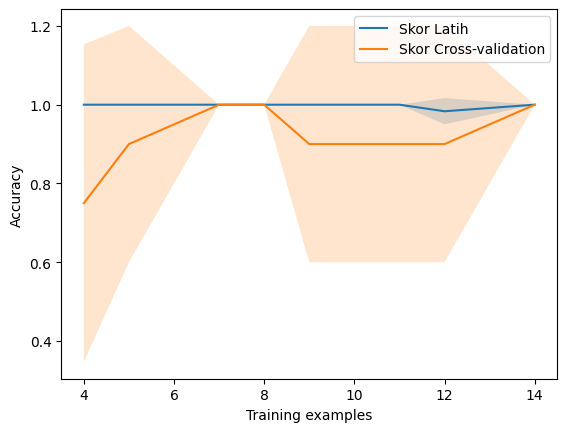

In [110]:
import matplotlib.pyplot as plt

# Buat kurva pembelajaran
plt.plot(train_sizes, train_mean, label='Skor Latih')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Skor Cross-validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

2. Lakukan evaluasi kinerja model menggunakan confution matrix: akurasi, recall, F1-score.
- Melakukan training ()

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Confusion Matrix:
 [[2 0]
 [0 2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


3. a. Bandingkan hasilnya dengan model soft-margin linear SVM c = 50.

- Mengulangi langkah yang sama dengan model normal linear SVM

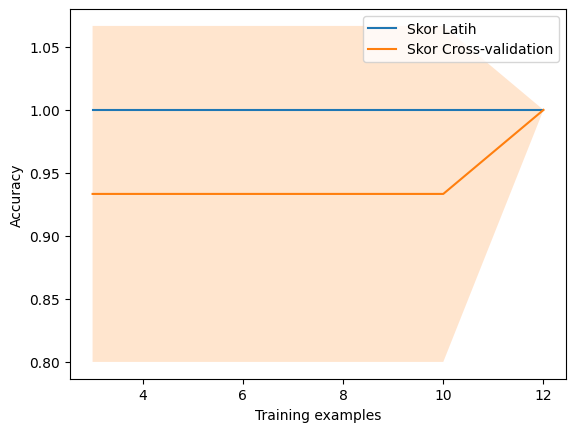

Confusion Matrix:
 [[2 0]
 [0 2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [112]:
# Membuat model soft-margin linear-SVM
clfSoftMargin = SVC(kernel='linear', C=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model dan membuat plot kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(clfSoftMargin, X_train, y_train, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Buat kurva pembelajaran
plt.plot(train_sizes, train_mean, label='Skor Latih')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Skor Cross-validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Benchmark performance
clfSoftMargin.fit(X_train, y_train)

y_pred = clfSoftMargin.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
 

3. b. Bandingkan hasilnya dengan model MLP 2-20-20-1, Relu

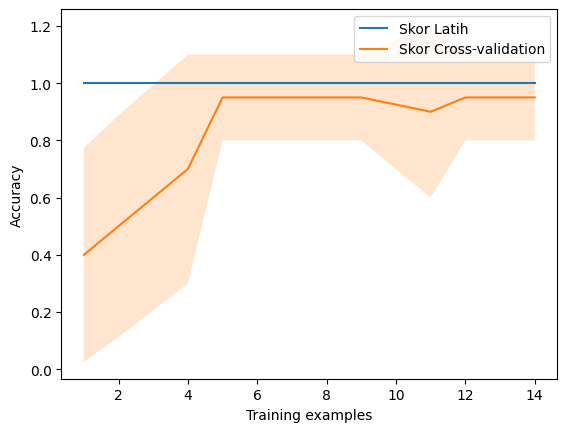

Confusion Matrix:
 [[2 0]
 [0 2]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [113]:
from sklearn.neural_network import MLPClassifier

# Membuat model
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', max_iter=1000, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=KFold(n_splits=10))

# Menghitung mean dan standar deviasi dari skor latih dan skor test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Membuat plot
plt.plot(train_sizes, train_mean, label='Skor Latih')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Skor Cross-validation')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Benchmark performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
 
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

### **Observasi**

Berdasrkan perbandingan diatas, dapat disimpulkan beberapa hal:
1. Ketiga model memiliki akurasi yang baik (1.0)
2. Akurasi Cross-validation (cv) pada model MLP memiliki nilai tertinggi (0.95) dengan 14 sampel training, pada model linear SVM cv mendatar dengan 7 training sample, dan model soft-margin linear SVM memiliki cv yang mendatar pada 12 training data sample.
3. Standar deviasi cv di model MLP adalah yang paling rendah

### **Kesimpulan**

Model MLP dengan arsitektur 2-20-20-1 dengan fungsi aktivasi ReLU adalah model dengan performa terbaik untuk tugas kali ini. Pertimbangan nya adalah:
- Memiliki akurasi cv yang stabil, dengan nilai tertinggi 0.95 dan stabil di angka tersebut (setidaknya dalam percobaan 10 kali training). Artinya model ini akan bisa memberikan prediksi yang akurat pada data yang baru yang belum pernah di prediksi.
- Memiliki cv std (gradien oranye) yang rendah, artinya model ini akan stabil meskipun diuji (test) pada data yang berbeda, tidak seperti dua model lainnya yang kemungkinan akan cenderung menunjukkan model yang lebih variatif jika diuji pada data baru (crossfitting).

Catatan: Kesimpulan ini tidak mempertimbangkan performa komputasi (karena sebenarnya waktu komputasi dengan model MLP adalah yang paling lambat)

***

*Daftar Pustaka*  
https://scikit-learn.org/stable/modules/cross_validation.html  
https://towardsdatascience.com/what-is-cross-validation-60c01f9d9e75  
https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
https://stackoverflow.com/questions/34914229/which-standard-deviation-of-the-cross-validation-score  